In [86]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.metrics import mean_squared_error
from sklearn.linear_model import Lasso
from xgboost import XGBRegressor


from sklearn.linear_model import LinearRegression

In [66]:
df = pd.read_csv("final_dataframe.csv")

In [75]:
X = df.drop("SalePrice", axis=1)
y = df["SalePrice"]

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

ss = StandardScaler()
scaled_X_train = ss.fit_transform(X_train)
scaled_X_test = ss.transform(X_test)

In [76]:
rfr = RandomForestRegressor()

rfr.fit(scaled_X_train, y_train)
y_pred0 = rfr.predict(scaled_X_train)
y_pred = rfr.predict(scaled_X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_pred0))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Train RMSE: {train_rmse}\nTest RMSE: {test_rmse}")

Train RMSE: 11012.73338516422
Test RMSE: 31550.919665034864


In [60]:
lasso = Lasso()

lasso.fit(X_train, y_train)
y_pred0 = lasso.predict(X_train)
y_pred = lasso.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_pred0))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Train RMSE: {train_rmse}\nTest RMSE: {test_rmse}")

Train RMSE: 17708.303778480335
Test RMSE: 55713.92697414642


/Users/markhurtado/opt/anaconda3/lib/python3.9/site-packages/sklearn/linear_model/_coordinate_descent.py:530: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Duality gap: 191846219368.9316, tolerance: 696659484.3571945
  model = cd_fast.enet_coordinate_descent(


In [77]:
gbr = GradientBoostingRegressor()

gbr.fit(scaled_X_train, y_train)
y_pred0 = gbr.predict(scaled_X_train)
y_pred = gbr.predict(scaled_X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_pred0))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Train RMSE: {train_rmse}\nTest RMSE: {test_rmse}")

Train RMSE: 13596.062742319928
Test RMSE: 27315.53700643262


In [62]:
xgb = XGBRegressor(objective='reg:squarederror', n_estimators=1000, learning_rate=0.01, max_depth=7) 

xgb.fit(X_train, y_train)
y_pred0 = xgb.predict(X_train)
y_pred = xgb.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_pred0))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))

print(f"Train RMSE: {train_rmse}\nTest RMSE: {test_rmse}")

Train RMSE: 4163.566366578267
Test RMSE: 32844.15463314908


In [63]:
lr= LinearRegression()
lr.fit(X_train, y_train)
y_pred0 = lr.predict(X_train)
y_pred = lr.predict(X_test)

train_rmse = np.sqrt(mean_squared_error(y_train, y_pred0))
test_rmse = np.sqrt(mean_squared_error(y_test, y_pred))
    
print(f"Train RMSE: {train_rmse}\nTest RMSE: {test_rmse}")

Train RMSE: 17654.326875448085
Test RMSE: 24023109.590361346


<AxesSubplot:>

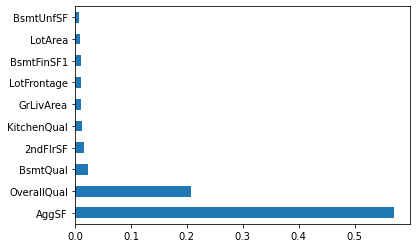

In [84]:
feat_importances = pd.Series(rfr.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')

## Parameter Tuning: Grid Search

In [87]:
gbr_parameters = {'learning_rate': [0.01,0.02,0.03,0.04],
                  'subsample'    : [0.9, 0.5, 0.2, 0.1],
                  'n_estimators' : [100,500,1000, 1500],
                  'max_depth'    : [4,6,8,10]
                 }

grid_gbr = GridSearchCV(estimator= gbr, param_grid=gbr_parameters, cv=3, n_jobs=-1)

grid_gbr.fit(scaled_X_train, y_train)

print(" Results from Grid Search " )
print("\n The best estimator across ALL searched params:\n",grid_gbr.best_estimator_)
print("\n The best score across ALL searched params:\n",grid_gbr.best_score_)
print("\n The best parameters across ALL searched params:\n",grid_gbr.best_params_)

 Results from Grid Search 

 The best estimator across ALL searched params:
 GradientBoostingRegressor(learning_rate=0.04, max_depth=4, n_estimators=1000,
                          subsample=0.5)

 The best score across ALL searched params:
 0.89293218316985

 The best parameters across ALL searched params:
 {'learning_rate': 0.04, 'max_depth': 4, 'n_estimators': 1000, 'subsample': 0.5}
